In [7]:
#################  construction for WC model  ######################

import pandas as pd

# WC_file = 'EdgeResult/edge_twitter15.txt'
# WC_file = 'EdgeResult/edge_COVID19.txt'
# WC_file = 'EdgeResult/edge_ubuntu.txt'
WC_file = 'EdgeResult/edge_youtube.txt'

# WC_out_file = 'Edge_WC/edge_WC_twitter15.txt'
# WC_out_file = 'Edge_WC/edge_WC_COVID19.txt'
# WC_out_file = 'Edge_WC/edge_WC_ubuntu.txt'
WC_out_file = 'Edge_WC/edge_WC_youtube.txt'

df = pd.read_csv(WC_file, sep="\t")

in_degree = df.groupby('node2').size().to_dict()

# Weighted Cascade: 1 / in_degree
df['pred_prob'] = df['node2'].map(lambda v: 1.0 / in_degree[v])

df.to_csv(WC_out_file, sep="\t", index=False)


In [11]:
#################  construction for TRI model  ######################
import pandas as pd
import numpy as np

# TRI_file = 'EdgeResult/edge_twitter15.txt'
# TRI_file = 'EdgeResult/edge_COVID19.txt'
# TRI_file = 'EdgeResult/edge_ubuntu.txt'
TRI_file = 'EdgeResult/edge_youtube.txt'

# TRI_out_file = 'Edge_TRI/edge_TRI_twitter15.txt'
# TRI_out_file = 'Edge_TRI/edge_TRI_COVID19.txt'
# TRI_out_file = 'Edge_TRI/edge_TRI_ubuntu.txt'
TRI_out_file = 'Edge_TRI/edge_TRI_youtube.txt'

df = pd.read_csv(TRI_file, sep="\t")
tri_probs = [0.1, 0.01, 0.001]
df['pred_prob'] = np.random.choice(tri_probs, size=len(df))

df.to_csv(TRI_out_file, sep="\t", index=False)


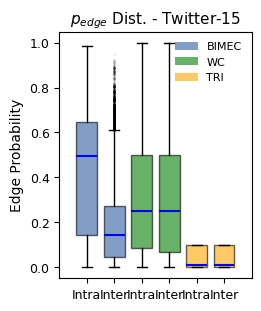

=== Statistical Results ===
BIMEC: Intra=0.4002, Inter=0.2002, p=0.00e+00
WC: Intra=0.3369, Inter=0.3074, p=1.60e-84
TRI: Intra=0.0371, Inter=0.0370, p=5.65e-01


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def analyze_multiple_from_files(file_dict, community_file, dataset_name="Dataset"):
    """
    file_dict: dict, {"BIMEC": "BIMEC.txt", "WC": "WC.txt", "TRI": "TRI.txt"}
    community_file: str, community path
    """

    communities_df = pd.read_csv(community_file, sep=r"\s+", header=None,
                                 names=["node", "community"], engine="python")
    communities_df["node"] = communities_df["node"].astype(str)
    node2comm = dict(zip(communities_df["node"], communities_df["community"]))

    stats = {}
    data_for_plot = []
    positions = []
    xticks, xticklabels = [], []

    colors = ["#2f5da3", "green", "orange"]  
    legend_handles = [] 
    group_gap = 0.4  
    intra_inter_gap = 0.2  

    flierprops = dict(marker='o', markerfacecolor='black',
                      markersize=0.1, linestyle='none', alpha=0.6)

    cur_pos = 1
    for idx, (method_name, file_path) in enumerate(file_dict.items()):
        edges_df = pd.read_csv(file_path, sep="\t")
        src_comm = edges_df["node1"].astype(str).map(node2comm)
        dst_comm = edges_df["node2"].astype(str).map(node2comm)

        same_mask = src_comm == dst_comm
        inter_mask = ~same_mask

        intra = edges_df.loc[same_mask, "pred_prob"].values
        inter = edges_df.loc[inter_mask, "pred_prob"].values

        t, p = ttest_ind(intra, inter, equal_var=False)
        stats[method_name] = {
            "intra_mean": intra.mean(),
            "inter_mean": inter.mean(),
            "p_value": p
        }

        data_for_plot.append(intra)
        positions.append(cur_pos)
        xticks.append(cur_pos)
        xticklabels.append("Intra")

        data_for_plot.append(inter)
        positions.append(cur_pos + intra_inter_gap)
        xticks.append(cur_pos + intra_inter_gap)
        xticklabels.append("Inter")


        legend_handles.append(
            plt.Rectangle((0, 0), 1, 1, facecolor=colors[idx], alpha=0.6, label=method_name)
        )

       
        cur_pos += group_gap


    plt.figure(figsize=(2.5, 3))

    bp = plt.boxplot(
        data_for_plot,
        positions=positions,
        patch_artist=True,
        flierprops=flierprops,
        widths=0.15,
        medianprops=dict(color="blue", linewidth=1.5)
    )
    plt.xlim(min(positions) - 0.2, max(positions) + 0.2)

    for i, patch in enumerate(bp['boxes']):
        method_idx = i // 2
        patch.set_facecolor(colors[method_idx])
        patch.set_alpha(0.6)

    plt.xticks(xticks, xticklabels, fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel("Edge Probability", fontsize=10)
    plt.title(fr"$p_{{edge}}$ Dist. - {dataset_name}", fontsize=11)

    plt.legend(handles=legend_handles, loc="upper right", fontsize=8, frameon=False)

    plt.tight_layout(pad=0.3)
    plt.savefig(f"Comparison_Results/boxplot_compare_{dataset_name}.pdf", dpi=600, bbox_inches="tight")
    plt.show()

    print("=== Statistical Results ===")
    for m, vals in stats.items():
        print(f"{m}: Intra={vals['intra_mean']:.4f}, "
              f"Inter={vals['inter_mean']:.4f}, "
              f"p={vals['p_value']:.2e}")

BIMEC_file = 'EdgeResult/edge_twitter15.txt'
# BIMEC_file = 'EdgeResult/edge_COVID19.txt'
# BIMEC_file = 'EdgeResult/edge_ubuntu.txt'
# BIMEC_file = 'EdgeResult/edge_youtube.txt'

WC_out_file = 'Edge_WC/edge_WC_twitter15.txt'
# WC_out_file = 'Edge_WC/edge_WC_COVID19.txt'
# WC_out_file = 'Edge_WC/edge_WC_ubuntu.txt'
# WC_out_file = 'Edge_WC/edge_WC_youtube.txt'

TRI_out_file = 'Edge_TRI/edge_TRI_twitter15.txt'
# TRI_out_file = 'Edge_TRI/edge_TRI_COVID19.txt'
# TRI_out_file = 'Edge_TRI/edge_TRI_ubuntu.txt'
# TRI_out_file = 'Edge_TRI/edge_TRI_youtube.txt'


file_dict = {
    "BIMEC": BIMEC_file,
    "WC": WC_out_file,
    "TRI": TRI_out_file
}

community_file = '../Datasets/Twitter-15/communities_louvain_filtered.txt'
# community_file = '../Datasets/Twitter-19/communities_covid19_louvain_filtered.txt'
# community_file = '../Datasets/AskUbuntu/communities_ubuntu_louvain_filtered.txt'
# community_file = '../Datasets/YouTube/node2comm_youtube.txt'



analyze_multiple_from_files(file_dict, community_file, dataset_name="Twitter-15")


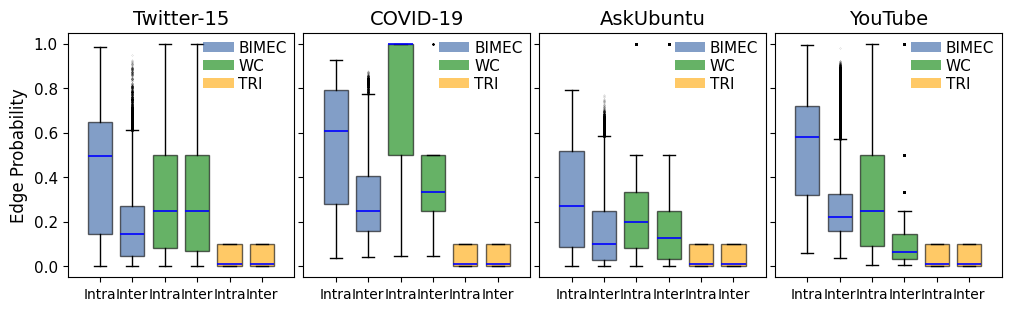

In [49]:
def analyze_multiple_datasets(file_dicts, community_files, dataset_names):
    colors = ["#2f5da3", "green", "orange"] 
    group_gap = 0.4
    intra_inter_gap = 0.2
    flierprops = dict(marker='o', markerfacecolor='black',
                      markersize=0.1, linestyle='none', alpha=0.6)

    fig, axes = plt.subplots(1, len(file_dicts), figsize=(10, 3), sharey=True)

    for ax, file_dict, community_file, dataset_name in zip(axes, file_dicts, community_files, dataset_names):
        
        communities_df = pd.read_csv(community_file, sep=r"\s+", header=None,
                                     names=["node", "community"], engine="python")
        communities_df["node"] = communities_df["node"].astype(str)
        node2comm = dict(zip(communities_df["node"], communities_df["community"]))

        data_for_plot, positions = [], []
        xticks, xticklabels = [], []
        legend_handles = []  

        cur_pos = 1
        for idx, (method_name, file_path) in enumerate(file_dict.items()):
            edges_df = pd.read_csv(file_path, sep="\t")
            src_comm = edges_df["node1"].astype(str).map(node2comm)
            dst_comm = edges_df["node2"].astype(str).map(node2comm)

            same_mask = src_comm == dst_comm
            inter_mask = ~same_mask

            intra = edges_df.loc[same_mask, "pred_prob"].values
            inter = edges_df.loc[inter_mask, "pred_prob"].values

            data_for_plot.append(intra)
            positions.append(cur_pos)
            xticks.append(cur_pos)
            xticklabels.append("Intra")

            data_for_plot.append(inter)
            positions.append(cur_pos + intra_inter_gap)
            xticks.append(cur_pos + intra_inter_gap)
            xticklabels.append("Inter")


            legend_handles.append(
                plt.Rectangle((0, 0), 1, 1, facecolor=colors[idx], alpha=0.6, label=method_name)
            )

            cur_pos += group_gap

        # 
        bp = ax.boxplot(
            data_for_plot,
            positions=positions,
            patch_artist=True,
            flierprops=flierprops,
            widths=0.15,
            medianprops=dict(color="blue", linewidth=1.2)
        )
        ax.set_xlim(min(positions) - 0.2, max(positions) + 0.2)

        for i, patch in enumerate(bp['boxes']):
            method_idx = i // 2
            patch.set_facecolor(colors[method_idx])
            patch.set_alpha(0.6)

        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, fontsize=10)
        ax.tick_params(axis="y", labelsize=11)
        ax.set_title(dataset_name, fontsize=14)

        if ax == axes[0]:
            ax.set_ylabel("Edge Probability", fontsize=12)


        # ax.legend(handles=legend_handles, loc="upper right", fontsize=11, frameon=False)
        ax.legend(
            handles=legend_handles,
            fontsize=11,
            frameon=False,
            loc="upper right",
            ncol=1,
            handletextpad=0.3,   
            columnspacing=0.8,  
            labelspacing=0.2,   
            borderaxespad=0.1   
            )

    plt.tight_layout(pad=0.3)
    plt.savefig("Comparison_Results/boxplot_all_datasets.pdf", dpi=600, bbox_inches="tight")
    plt.show()

    
    
file_dicts = [
    {"BIMEC": "EdgeResult/edge_twitter15.txt", "WC": "Edge_WC/edge_WC_twitter15.txt", "TRI": "Edge_TRI/edge_TRI_twitter15.txt"},
    {"BIMEC": "EdgeResult/edge_twitter19.txt", "WC": "Edge_WC/edge_WC_COVID19.txt", "TRI": "Edge_TRI/edge_TRI_COVID19.txt"},
    {"BIMEC": "EdgeResult/edge_ubuntu.txt", "WC": "Edge_WC/edge_WC_ubuntu.txt", "TRI": "Edge_TRI/edge_TRI_ubuntu.txt"},
    {"BIMEC": "EdgeResult/edge_youtube.txt", "WC": "Edge_WC/edge_WC_youtube.txt", "TRI": "Edge_TRI/edge_TRI_youtube.txt"}
]

community_files = [
    "../Datasets/Twitter-15/communities_louvain_filtered.txt",
    "../Datasets/Twitter-19/communities_covid19_louvain_filtered.txt",
    "../Datasets/AskUbuntu/communities_ubuntu_louvain_filtered.txt",
    "../Datasets/YouTube/node2comm_youtube.txt"
]

dataset_names = ["Twitter-15", "COVID-19", "AskUbuntu", "YouTube"]

analyze_multiple_datasets(file_dicts, community_files, dataset_names)

